In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import re
import pickle
import seaborn as sns
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import statsmodels.formula.api as smf
%matplotlib inline

In [218]:
#Open movie_data dictionary
import pickle

with open("movie_data.pkl", 'rb') as picklefile: 
    movie_data = pickle.load(picklefile)
    
movie_data

[{'Budget': '185000000',
  'Genre1': 'Action',
  'Genre2': 'Crime',
  'Gross_Revenue': '533316061',
  'IMDB_Reviews': 1698798,
  'IMDB_Score': 9.0,
  'Metascore': 82,
  'Month': 'July',
  'Opening_Week_Revenue': '158411483',
  'Oscar_Wins': 2,
  'Rating': 'PG-13',
  'Run_Time': '152',
  'Title': 'The Dark Knight',
  'Year': '2008'},
 {'Budget': '94000000',
  'Genre1': 'Action',
  'Genre2': 'Adventure',
  'Gross_Revenue': '377019252',
  'IMDB_Reviews': 1230627,
  'IMDB_Score': 8.9,
  'Metascore': 94,
  'Month': 'December',
  'Opening_Week_Revenue': '£15021761',
  'Oscar_Wins': 11,
  'Rating': 'PG-13',
  'Run_Time': '201',
  'Title': 'The Lord of the Rings: The Return of the King',
  'Year': '2003'},
 {'Budget': '160000000',
  'Genre1': 'Action',
  'Genre2': 'Adventure',
  'Gross_Revenue': '292568851',
  'IMDB_Reviews': 1489333,
  'IMDB_Score': 8.8,
  'Metascore': 74,
  'Month': 'July',
  'Opening_Week_Revenue': '£5912814',
  'Oscar_Wins': 4,
  'Rating': 'PG-13',
  'Run_Time': '148',
  '

In [219]:
#Convert dict to pandas df
movies_df = pd.DataFrame(movie_data)
movies_df

,Budget,Genre1,Genre2,Gross_Revenue,IMDB_Reviews,IMDB_Score,Metascore,Month,Opening_Week_Revenue,Oscar_Wins,Rating,Run_Time,Title,Year
0,185000000,Action,Crime,533316061,1698798,9.0,82.0,July,158411483,2,PG-13,152,The Dark Knight,2008
1,94000000,Action,Adventure,377019252,1230627,8.9,94.0,December,£15021761,11,PG-13,201,The Lord of the Rings: The Return of the King,2003
2,160000000,Action,Adventure,292568851,1489333,8.8,74.0,July,£5912814,4,PG-13,148,Inception,2010
3,18000000,Action,Adventure,290158751,849150,8.8,80.0,June,ITL 609584000,1,PG,124,Star Wars: Episode V - The Empire Strikes Back,1980
4,93000000,Action,Adventure,313837577,1253381,8.8,92.0,December,£11058045,4,PG-13,178,The Lord of the Rings: The Fellowship of the Ring,2001
5,11000000,Action,Adventure,460935665,922323,8.7,92.0,May,35906661,6,PG,121,Star Wars: Episode IV - A New Hope,1977
6,63000000,Action,Sci-Fi,171383253,1233245,8.7,73.0,March,27788331,4,R,136,The Matrix,1999
7,2000000,Action,Adventure,269061,232010,8.7,98.0,November,21830,0,UNRATED,207,Seven Samurai,1954
8,94000000,Action,Adventure,340478898,1114240,8.7,88.0,December,£13063560,2,PG-13,179,The Lord of the Rings: The Two Towers,2002
9,70000000,Action,Drama,216119491,893790,8.6,90.0,July,30576104,5,R,169,Saving Private Ryan,1998


In [220]:
movies_df = movies_df.dropna()
movies_df = movies_df.reset_index()
movies_df

,index,Budget,Genre1,Genre2,Gross_Revenue,IMDB_Reviews,IMDB_Score,Metascore,Month,Opening_Week_Revenue,Oscar_Wins,Rating,Run_Time,Title,Year
0,0,185000000,Action,Crime,533316061,1698798,9.0,82.0,July,158411483,2,PG-13,152,The Dark Knight,2008
1,1,94000000,Action,Adventure,377019252,1230627,8.9,94.0,December,£15021761,11,PG-13,201,The Lord of the Rings: The Return of the King,2003
2,2,160000000,Action,Adventure,292568851,1489333,8.8,74.0,July,£5912814,4,PG-13,148,Inception,2010
3,3,18000000,Action,Adventure,290158751,849150,8.8,80.0,June,ITL 609584000,1,PG,124,Star Wars: Episode V - The Empire Strikes Back,1980
4,4,93000000,Action,Adventure,313837577,1253381,8.8,92.0,December,£11058045,4,PG-13,178,The Lord of the Rings: The Fellowship of the Ring,2001
5,5,11000000,Action,Adventure,460935665,922323,8.7,92.0,May,35906661,6,PG,121,Star Wars: Episode IV - A New Hope,1977
6,6,63000000,Action,Sci-Fi,171383253,1233245,8.7,73.0,March,27788331,4,R,136,The Matrix,1999
7,7,2000000,Action,Adventure,269061,232010,8.7,98.0,November,21830,0,UNRATED,207,Seven Samurai,1954
8,8,94000000,Action,Adventure,340478898,1114240,8.7,88.0,December,£13063560,2,PG-13,179,The Lord of the Rings: The Two Towers,2002
9,9,70000000,Action,Drama,216119491,893790,8.6,90.0,July,30576104,5,R,169,Saving Private Ryan,1998


In [221]:
movies_df[['Run_Time']] = movies_df[['Run_Time']].astype(int)

In [222]:
#Change foreign currencies
currencies = set()

for element in movies_df['Budget']:
    if not element[0].isdigit():
        if element[0] == '£':
            currencies.add('£')
        elif element[0] == '€':
            currencies.add('€')
        else:
            curr = element
            currencies.add(curr.split()[0])

for element in movies_df['Opening_Week_Revenue']:
    if not element[0].isdigit():
        if element[0] == '£':
            currencies.add('£')
        elif element[0] == '€':
            currencies.add('€')
        else:
            curr = element
            currencies.add(curr.split()[0])

for element in movies_df['Gross_Revenue']:
    if not element[0].isdigit():
        if element[0] == '£':
            currencies.add('£')
        elif element[0] == '€':
            currencies.add('€')
        else:
            curr = element
            currencies.add(curr.split()[0])


print(currencies)

{'INR', 'NOK', 'ATS', 'ITL', 'KRW', '£', 'NZD', 'JPY', 'DKK', '€', 'DEM', 'AUD', 'CNY', 'CAD', 'SEK', 'FRF'}


In [223]:
currency_exchange = {'CNY': 0.15, '£': 1.29, 'NOK': 0.13, 'KRW': 0.00091, 'NZD': 0.73, 'CAD': 0.76, 'DKK':0.15, 'AUD': 0.77, 'ITL': 0.00058, '€': 1.12, 'DEM': 0.5741, 'SEK': 0.12, 'FRF': 0.17118, 'ATS': 0.08160, 'JPY': 0.0098, 'INR': 0.015}
movies_df[['Budget']] = movies_df[['Budget']].astype(str)
movies_df[['Gross_Revenue']] = movies_df[['Gross_Revenue']].astype(str)
movies_df[['Opening_Week_Revenue']] = movies_df[['Opening_Week_Revenue']].astype(str)

In [224]:
#converting foreign currencies to USD

for i in range(0, len(movies_df['Gross_Revenue'])):
    element = movies_df['Gross_Revenue'][i]
    if not element[0].isdigit():
        if element[0] == '£':
            usd = int(element[1:])*currency_exchange['£']
            movies_df['Gross_Revenue'][i] = str(usd)
        elif element[0] == '€':
            usd = int(element[1:])*currency_exchange['€']
            movies_df['Gross_Revenue'][i] = str(usd)
        else:
            item = element.split()
            currency = item[0]
            value = item[1]
            usd = int(value)*currency_exchange[currency]
            movies_df['Gross_Revenue'][i] = str(usd)

for i in range(0, len(movies_df['Budget'])):
    element = movies_df['Budget'][i]
    if not element[0].isdigit():
        if element[0] == '£':
            usd = int(element[1:])*currency_exchange['£']
            movies_df['Budget'][i] = str(usd)
        elif element[0] == '€':
            usd = int(element[1:])*currency_exchange['€']
            movies_df['Budget'][i] = str(usd)
        else:
            item = element.split()
            currency = item[0]
            value = item[1]
            usd = int(value)*currency_exchange[currency]
            movies_df['Budget'][i] = str(usd)
            
for i in range(0, len(movies_df['Opening_Week_Revenue'])):
    element = movies_df['Opening_Week_Revenue'][i]
    if not element[0].isdigit():
        if element[0] == '£':
            usd = int(element[1:])*currency_exchange['£']
            movies_df['Opening_Week_Revenue'][i] = str(usd)
        elif element[0] == '€':
            usd = int(element[1:])*currency_exchange['€']
            movies_df['Opening_Week_Revenue'][i] = str(usd)
        else:
            item = element.split()
            currency = item[0]
            value = item[1]
            usd = int(value)*currency_exchange[currency]
            movies_df['Opening_Week_Revenue'][i] = str(usd)

/Users/travisjames/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/travisjames/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/travisjames/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/travisjames/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:40: SettingWithCopyWarning: 
A

In [225]:
movies_df['Opening_Week_Revenue'] = movies_df['Opening_Week_Revenue'].astype(float)
movies_df['Gross_Revenue'] = movies_df['Gross_Revenue'].astype(float)
movies_df['Budget'] = movies_df['Budget'].astype(float)

In [226]:
cpi_df = pd.read_csv('CPI_Adjustment.csv')
cpi_df['Year'] = cpi_df['Year'].astype(str)

#Adding cpi adjustment data

df = movies_df.merge(cpi_df, how='left' , left_on='Year', right_on='Year')

In [227]:
#Adjusting monetary figures for inflation

df['Budget'] = df['Budget']*df['CPI Adjustment']
df['Gross_Revenue'] = df['Gross_Revenue']*df['CPI Adjustment']
df['Opening_Week_Revenue'] = df['Opening_Week_Revenue']*df['CPI Adjustment']

In [228]:
#Normalizing the monetary figures
std_scale = preprocessing.StandardScaler().fit(df[['Budget', 'Gross_Revenue', 'Opening_Week_Revenue']])
df_std = std_scale.transform(df[['Budget', 'Gross_Revenue', 'Opening_Week_Revenue']])

In [229]:
df_std = pd.DataFrame(df_std)

In [230]:
df_std.columns = [['Budget_std', 'Gross_Rev_std', 'Opening_Week_Rev_std']]

In [231]:
df = df.merge(df_std, left_index=True, right_index=True)

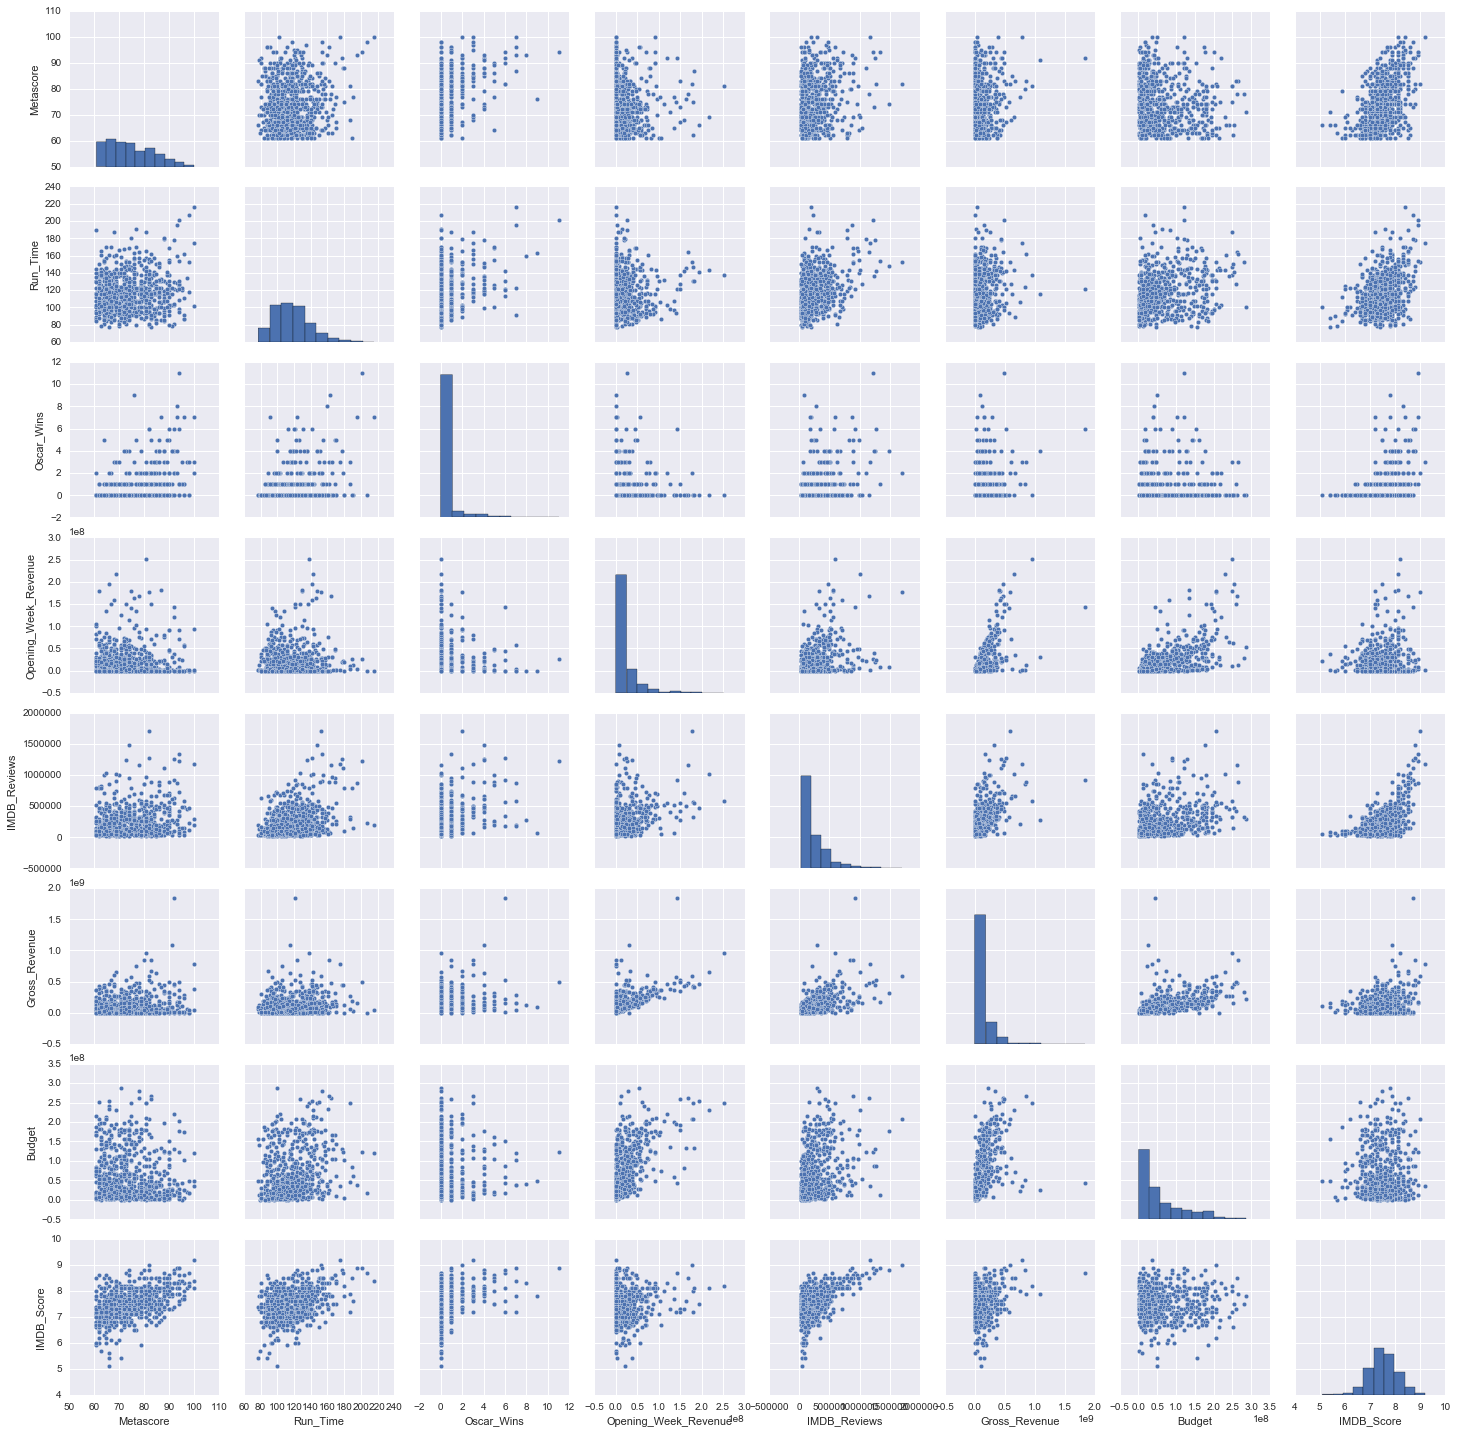

In [232]:
sns.pairplot(df[['Metascore', 'Run_Time', 'Oscar_Wins', 'Opening_Week_Revenue', 'IMDB_Reviews', 'Gross_Revenue', 'Budget', 'IMDB_Score']]);

In [233]:
y = df['IMDB_Score']
X = df[['Run_Time', 'Oscar_Wins', 'Opening_Week_Revenue', 'IMDB_Reviews', 'Gross_Revenue', 'Budget', 'Metascore']]

In [234]:
df[['IMDB_Score', 'Run_Time', 'Oscar_Wins', 'Opening_Week_Revenue', 'IMDB_Reviews', 'Gross_Revenue', 'Budget', 'Metascore']].corr()

,IMDB_Score,Run_Time,Oscar_Wins,Opening_Week_Revenue,IMDB_Reviews,Gross_Revenue,Budget,Metascore
IMDB_Score,1.000000,0.376249,0.360022,0.063691,0.590476,0.231523,-0.001509,0.491634
Run_Time,0.376249,1.000000,0.299922,0.071526,0.388994,0.183728,0.256086,0.109208
Oscar_Wins,0.360022,0.299922,1.000000,-0.002098,0.402121,0.303850,0.091124,0.416551
Opening_Week_Revenue,0.063691,0.071526,-0.002098,1.000000,0.396470,0.661519,0.647708,-0.068927
IMDB_Reviews,0.590476,0.388994,0.402121,0.396470,1.000000,0.581453,0.412060,0.193774
Gross_Revenue,0.231523,0.183728,0.303850,0.661519,0.581453,1.000000,0.572465,0.101557
Budget,-0.001509,0.256086,0.091124,0.647708,0.412060,0.572465,1.000000,-0.120469
Metascore,0.491634,0.109208,0.416551,-0.068927,0.193774,0.101557,-0.120469,1.000000


In [235]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X, y)
print(mi)

#IMDB Reviews and Metascore have fairly high mutual information scores compared to other variables

[ 0.11227943  0.05026624  0.00227801  0.31847515  0.01654869  0.
  0.12660171]


In [236]:
#statsmodels approach
import statsmodels.formula.api as smf

lm1 = smf.ols('IMDB_Score ~ Metascore + Run_Time + Oscar_Wins + Budget_std + Gross_Rev_std + Opening_Week_Rev_std + IMDB_Reviews + Year + Genre1 + Genre2 + Rating + Month', data=df)
fit1 = lm1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDB_Score   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     13.36
Date:                Thu, 06 Oct 2016   Prob (F-statistic):          9.70e-101
Time:                        09:18:56   Log-Likelihood:                -198.63
No. Observations:                 720   AIC:                             591.3
Df Residuals:                     623   BIC:                             1035.
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                5.1458      0.347     14.834      0.000         4.465     5.827
Year[T.1936]             0.7261      0.534      1.360      0.174        -0.322     1.775
Year[T.1939]             0.3307      0.219      1.509      0.132        -0.100     0.761
Year[T.1954]            -0.2091      0.549     -0.381      0.703        -1.287     0.869
Year[T.1962]             0.2807      0.542      0.518      0.605        -0.783     1.345
Year[T.1964]             0.5962      0.529      1.127      0.260        -0.443     1.635
Year[T.1966]            -0.0719      0.552     -0.130      0.896        -1.155     1.012
Year[T.1967]             1.1519      0.431      2.671      0.008         0.305     1.999
Year[T.1972]            -0.2534      0.543     -0.467      0.641        -1.320     0.813
Year[T.1975]             0.3712      0.535      0.694      0.488        -0.680     1.422
Year[T.1977]             0.8491      0.616      1.379      0.169        -0.360     2.059
Year[T.1979]            -0.0201      0.501     -0.040      0.968        -1.004     0.963
Year[T.1980]             0.4852      0.472      1.028      0.304        -0.441     1.412
Year[T.1981]             0.3327      0.448      0.742      0.458        -0.547     1.213
Year[T.1982]             0.3866      0.475      0.814      0.416        -0.546     1.319
Year[T.1983]             0.0014      0.529      0.003      0.998        -1.037     1.040
Year[T.1984]             0.3880      0.436      0.889      0.374        -0.469     1.245
Year[T.1985]             0.3278      0.468      0.700      0.484        -0.591     1.247
Year[T.1987]             0.1514      0.543      0.279      0.780        -0.915     1.218
Year[T.1988]             0.2761      0.531      0.520      0.603        -0.767     1.319
Year[T.1993]            -0.3775      0.423     -0.893      0.372        -1.208     0.453
Year[T.1994]            -0.0188      0.419     -0.045      0.964        -0.841     0.803
Year[T.1995]            -0.1672      0.413     -0.405      0.686        -0.978     0.644
Year[T.1996]            -0.1258      0.409     -0.308      0.758        -0.928     0.677
Year[T.1997]            -0.1714      0.403     -0.425      0.671        -0.963     0.621
Year[T.1998]            -0.0961      0.403     -0.238      0.812        -0.888     0.696
Year[T.1999]            -0.1494      0.400     -0.373      0.709        -0.936     0.637
Year[T.2000]            -0.1096      0.404     -0.272      0.786        -0.902     0.683
Year[T.2001]            -0.1788      0.400     -0.447      0.655        -0.965     0.608
Year[T.2002]            -0.2507      0.401     -0.625      0.532        -1.038     0.537
Year[T.2003]            -0.2213      0.402     -0.550      0.582        -1.011     0.568
Year[T.2004]            -0.0182      0.401     -0.045    

In [237]:
#Removing opening week revenue
lm2 = smf.ols('IMDB_Score ~ Metascore + Run_Time + Oscar_Wins + IMDB_Reviews + Gross_Rev_std + Budget_std + Year + Genre1 + Genre2 + Rating + Month', data=df)
fit2 = lm2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDB_Score   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     13.49
Date:                Thu, 06 Oct 2016   Prob (F-statistic):          4.11e-101
Time:                        09:19:00   Log-Likelihood:                -199.19
No. Observations:                 720   AIC:                             590.4
Df Residuals:                     624   BIC:                             1030.
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept               5.1478      0.347     14.840      0.000         4.467     5.829
Year[T.1936]            0.7201      0.534      1.349      0.178        -0.328     1.768
Year[T.1939]            0.3535      0.218      1.621      0.105        -0.075     0.782
Year[T.1954]           -0.2012      0.549     -0.367      0.714        -1.279     0.876
Year[T.1962]            0.3123      0.541      0.577      0.564        -0.750     1.374
Year[T.1964]            0.6025      0.529      1.139      0.255        -0.436     1.641
Year[T.1966]           -0.0667      0.552     -0.121      0.904        -1.150     1.017
Year[T.1967]            1.0861      0.426      2.550      0.011         0.250     1.923
Year[T.1972]           -0.3294      0.537     -0.613      0.540        -1.385     0.726
Year[T.1975]            0.3707      0.535      0.693      0.489        -0.680     1.422
Year[T.1977]            0.7673      0.610      1.257      0.209        -0.431     1.966
Year[T.1979]           -0.0468      0.500     -0.094      0.925        -1.029     0.935
Year[T.1980]            0.4480      0.470      0.952      0.341        -0.476     1.372
Year[T.1981]            0.3144      0.448      0.702      0.483        -0.565     1.194
Year[T.1982]            0.3895      0.475      0.820      0.413        -0.543     1.322
Year[T.1983]           -0.0008      0.529     -0.002      0.999        -1.039     1.037
Year[T.1984]            0.3818      0.436      0.875      0.382        -0.475     1.239
Year[T.1985]            0.3064      0.468      0.655      0.513        -0.612     1.225
Year[T.1987]            0.1697      0.543      0.313      0.755        -0.896     1.235
Year[T.1988]            0.2775      0.531      0.523      0.601        -0.765     1.320
Year[T.1993]           -0.3857      0.423     -0.912      0.362        -1.216     0.445
Year[T.1994]           -0.0298      0.418     -0.071      0.943        -0.851     0.792
Year[T.1995]           -0.1760      0.413     -0.426      0.670        -0.987     0.635
Year[T.1996]           -0.1224      0.409     -0.299      0.765        -0.925     0.680
Year[T.1997]           -0.1674      0.403     -0.415      0.678        -0.959     0.624
Year[T.1998]           -0.0973      0.403     -0.241      0.809        -0.889     0.695
Year[T.1999]           -0.1502      0.400     -0.375      0.708        -0.937     0.636
Year[T.2000]           -0.1077      0.404     -0.267      0.790        -0.900     0.685
Year[T.2001]           -0.1795      0.400     -0.448      0.654        -0.966     0.607
Year[T.2002]           -0.2492      0.401     -0.622      0.534        -1.036     0.538
Year[T.2003]           -0.2223      0.402     -0.553      0.581        -1.012     0.567
Year[T.2004]           -0.0129      0.401     -0.032      0.974        -0.800     0.774
Yea

In [244]:
df['imdb_reviews_log'] = np.log(df['IMDB_Reviews'])
df['runtime_log'] = np.log(df['Run_Time'])
df['oscar_wins_log'] = np.log(df['Oscar_Wins'])
df['gross_rev_log'] = np.log(df['Gross_Revenue'])

In [246]:
#adding log terms for number of imdb reviews and gross revenue
lm3 = smf.ols('IMDB_Score ~  imdb_reviews_log + gross_rev_log + Metascore + Run_Time + Oscar_Wins + IMDB_Reviews + Gross_Revenue + Budget + Year + Genre1 + Genre2 + Rating + Month', data=df)
fit3 = lm3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDB_Score   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     14.70
Date:                Thu, 06 Oct 2016   Prob (F-statistic):          2.08e-109
Time:                        09:20:17   Log-Likelihood:                -172.17
No. Observations:                 720   AIC:                             540.3
Df Residuals:                     622   BIC:                             989.1
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept               4.7935      0.450     10.652      0.000         3.910     5.677
Year[T.1936]            0.4522      0.517      0.875      0.382        -0.563     1.467
Year[T.1939]            0.3380      0.211      1.600      0.110        -0.077     0.753
Year[T.1954]           -0.0340      0.529     -0.064      0.949        -1.072     1.004
Year[T.1962]            0.2033      0.522      0.389      0.697        -0.823     1.229
Year[T.1964]            0.7091      0.510      1.389      0.165        -0.293     1.711
Year[T.1966]            0.4152      0.535      0.777      0.438        -0.635     1.465
Year[T.1967]            1.0986      0.400      2.749      0.006         0.314     1.883
Year[T.1972]           -0.1901      0.511     -0.372      0.710        -1.194     0.814
Year[T.1975]            0.2928      0.516      0.567      0.571        -0.720     1.306
Year[T.1977]            0.4199      0.523      0.803      0.422        -0.607     1.447
Year[T.1979]            0.1081      0.483      0.224      0.823        -0.840     1.056
Year[T.1980]            0.2782      0.452      0.616      0.538        -0.608     1.165
Year[T.1981]            0.4796      0.431      1.114      0.266        -0.366     1.325
Year[T.1982]            0.6756      0.458      1.476      0.140        -0.223     1.574
Year[T.1983]            0.1954      0.510      0.383      0.702        -0.806     1.197
Year[T.1984]            0.5068      0.420      1.206      0.228        -0.318     1.332
Year[T.1985]            0.4919      0.450      1.093      0.275        -0.392     1.376
Year[T.1987]            0.3752      0.523      0.717      0.474        -0.653     1.403
Year[T.1988]            0.4634      0.512      0.905      0.366        -0.542     1.469
Year[T.1993]           -0.1213      0.408     -0.297      0.766        -0.922     0.679
Year[T.1994]            0.2644      0.404      0.654      0.513        -0.530     1.058
Year[T.1995]            0.1225      0.399      0.307      0.759        -0.662     0.907
Year[T.1996]            0.1049      0.395      0.266      0.790        -0.670     0.880
Year[T.1997]            0.1029      0.390      0.264      0.792        -0.662     0.868
Year[T.1998]            0.1447      0.390      0.371      0.711        -0.620     0.910
Year[T.1999]            0.1112      0.387      0.287      0.774        -0.649     0.872
Year[T.2000]            0.1371      0.390      0.352      0.725        -0.628     0.903
Year[T.2001]            0.0176      0.387      0.045      0.964        -0.742     0.777
Year[T.2002]           -0.0030      0.387     -0.008      0.994        -0.763     0.757
Year[T.2003]            0.0403      0.388      0.104      0.917        -0.723     0.803
Year[T.2004]            0.1870      0.387      0.483      0.629        -0.573     0.947
Yea

In [240]:
month_dict = {
    "Month":['January','February','March','April','May','June','July','August','September','October','November','December'],
    "Month_int":[1,2,3,4,5,6,7,8,9,10,11,12]
}
month_df = pd.DataFrame(month_dict)

In [251]:
df = movies_df.merge(month_df, how='left' , left_on='Month', right_on='Month')

In [253]:
df['imdb_reviews_log'] = np.log(df['IMDB_Reviews'])
df['runtime_log'] = np.log(df['Run_Time'])
df['oscar_wins_log'] = np.log(df['Oscar_Wins'])
df['gross_rev_log'] = np.log(df['Gross_Revenue'])

In [254]:
df.columns

Index(['index', 'Budget', 'Genre1', 'Genre2', 'Gross_Revenue', 'IMDB_Reviews',
       'IMDB_Score', 'Metascore', 'Month', 'Opening_Week_Revenue',
       'Oscar_Wins', 'Rating', 'Run_Time', 'Title', 'Year', 'Month_int',
       'imdb_reviews_log', 'runtime_log', 'oscar_wins_log', 'gross_rev_log'],
      dtype='object')

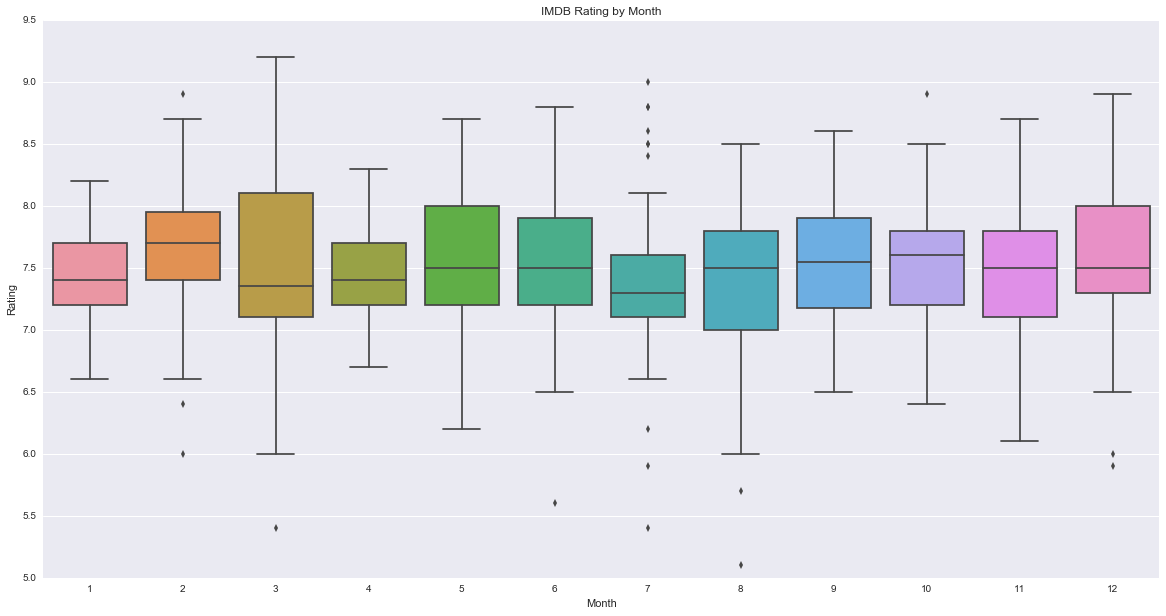

In [131]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('IMDB Rating by Month')

sns.boxplot(x=df['Month_int'], y=df['IMDB_Score'])
ax.set_xlabel('Month')
ax.set_ylabel('Rating');

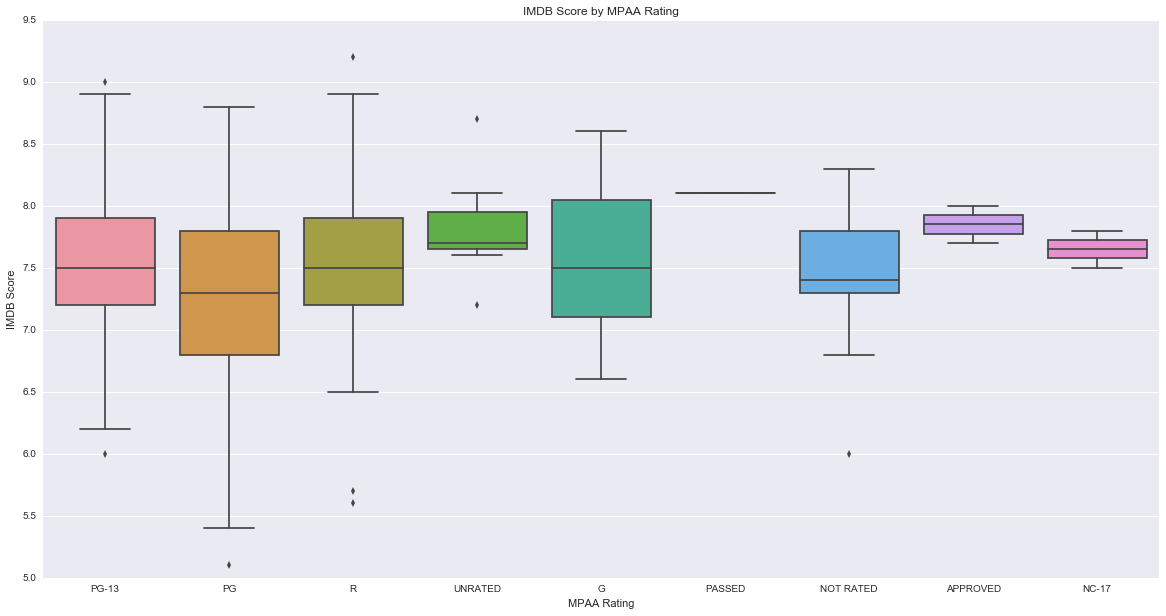

In [144]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('IMDB Score by MPAA Rating')

sns.boxplot(x=df['Rating'], y=df['IMDB_Score'])
ax.set_xlabel('MPAA Rating')
ax.set_ylabel('IMDB Score');

In [166]:
#df['Popular_Rating'] = df['Rating'].map(lambda x: 1 if x == 'UNRATED' or x == 'PASSED' or x == 'APPROVED' or x == 'NC-17' else 0)

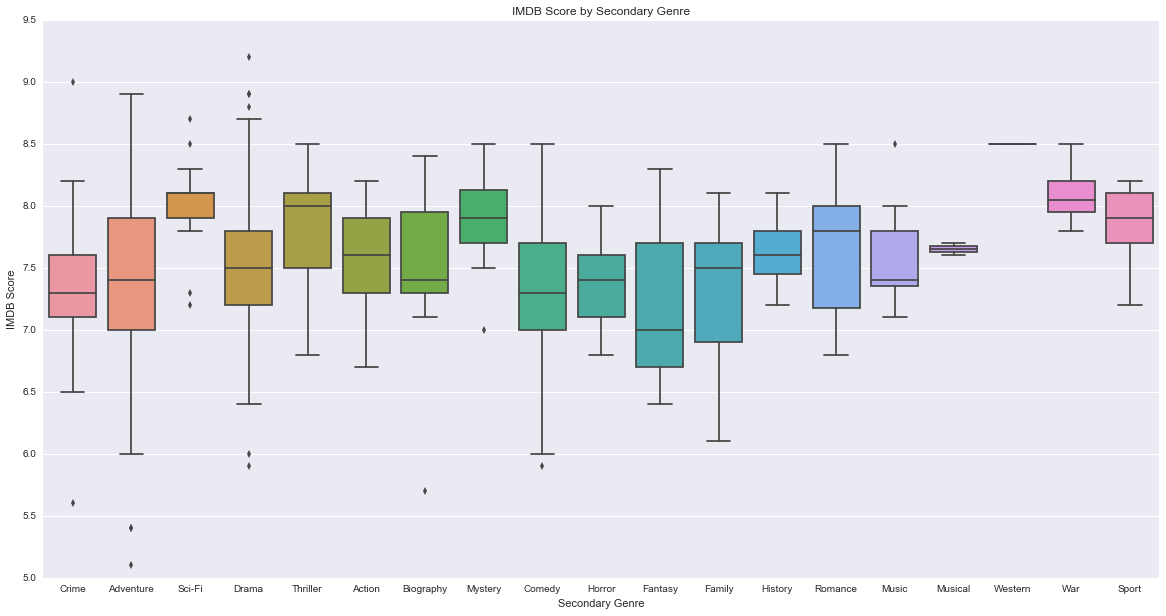

In [143]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('IMDB Score by Secondary Genre')

sns.boxplot(x=df['Genre2'], y=df['IMDB_Score'])
ax.set_xlabel('Secondary Genre')
ax.set_ylabel('IMDB Score');

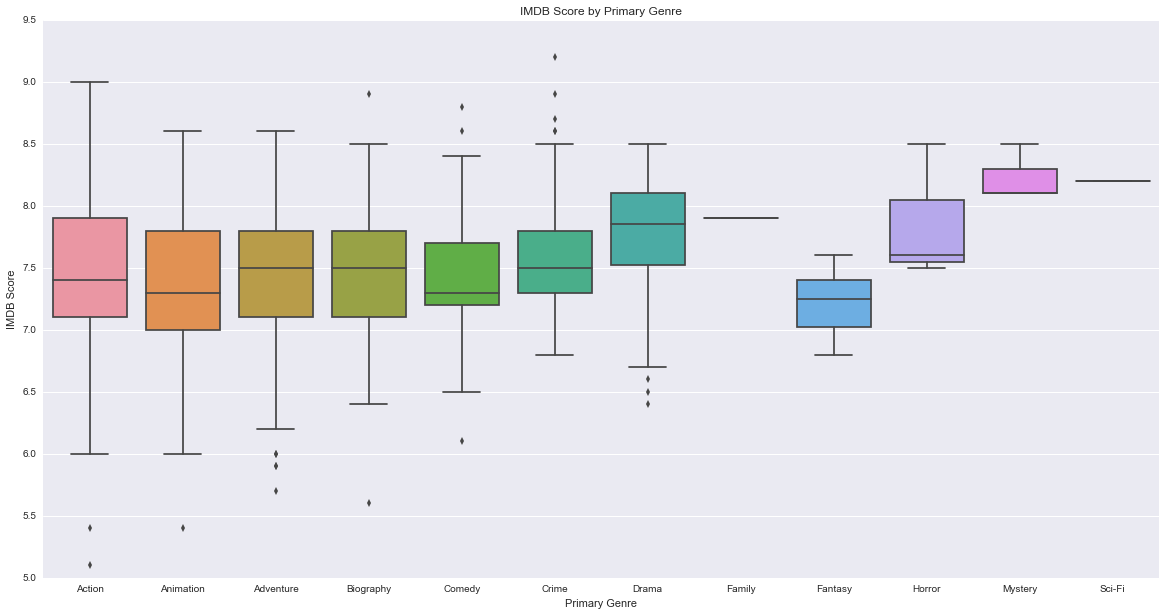

In [142]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('IMDB Score by Primary Genre')

sns.boxplot(x=df['Genre1'], y=df['IMDB_Score'])
ax.set_xlabel('Primary Genre')
ax.set_ylabel('IMDB Score');

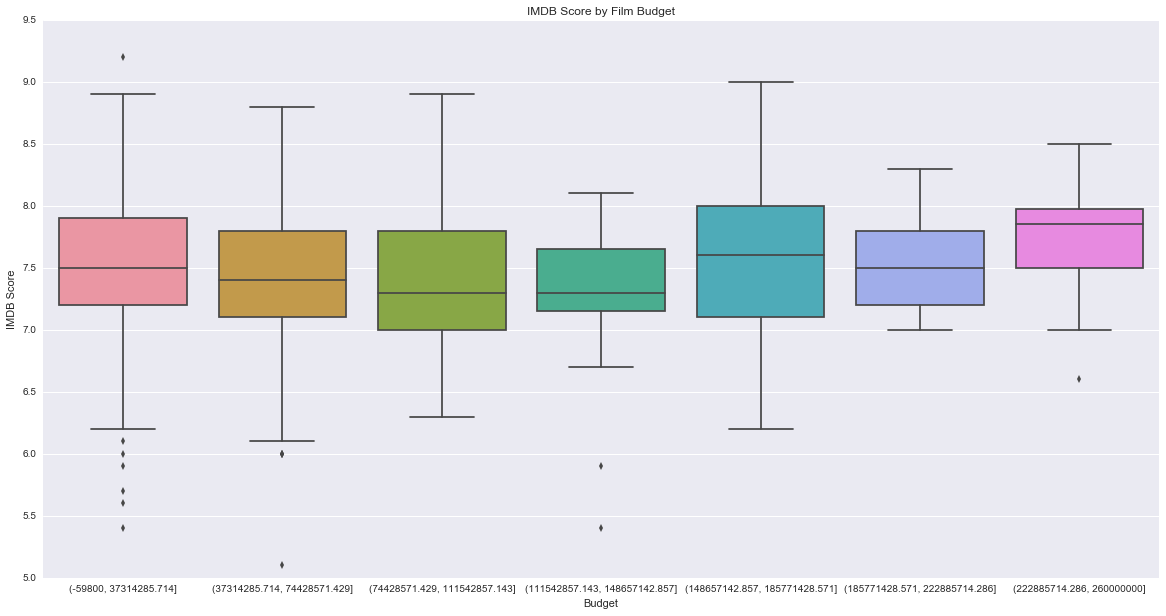

In [140]:
binned_x = pd.cut(df['Budget'], bins=7)

fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('IMDB Score by Film Budget')

sns.boxplot(x=binned_x.sort_values(), y=df['IMDB_Score'])
ax.set_xlabel('Budget')
ax.set_ylabel('IMDB Score');

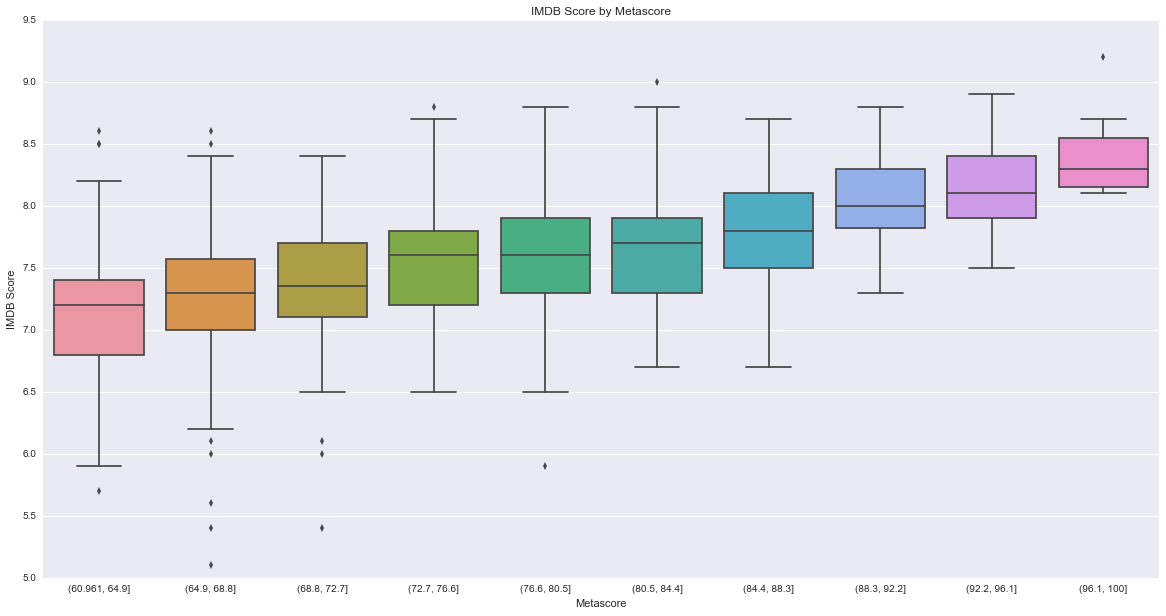

In [152]:
binned_x = pd.cut(df['Metascore'], bins=10)

fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('IMDB Score by Metascore')

sns.boxplot(x=binned_x.sort_values(), y=df['IMDB_Score'])
ax.set_xlabel('Metascore')
ax.set_ylabel('IMDB Score');

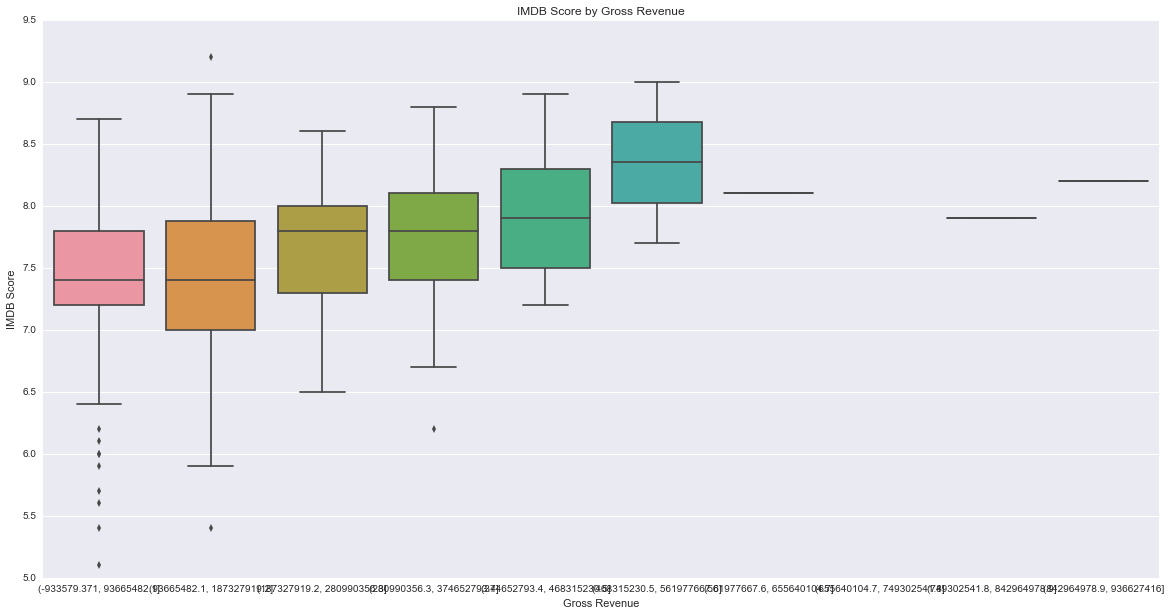

In [139]:
binned_x = pd.cut(df['Gross_Revenue'], bins=10)

fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('IMDB Score by Gross Revenue')

sns.boxplot(x=binned_x.sort_values(), y=df['IMDB_Score'])
ax.set_xlabel('Gross Revenue')
ax.set_ylabel('IMDB Score');

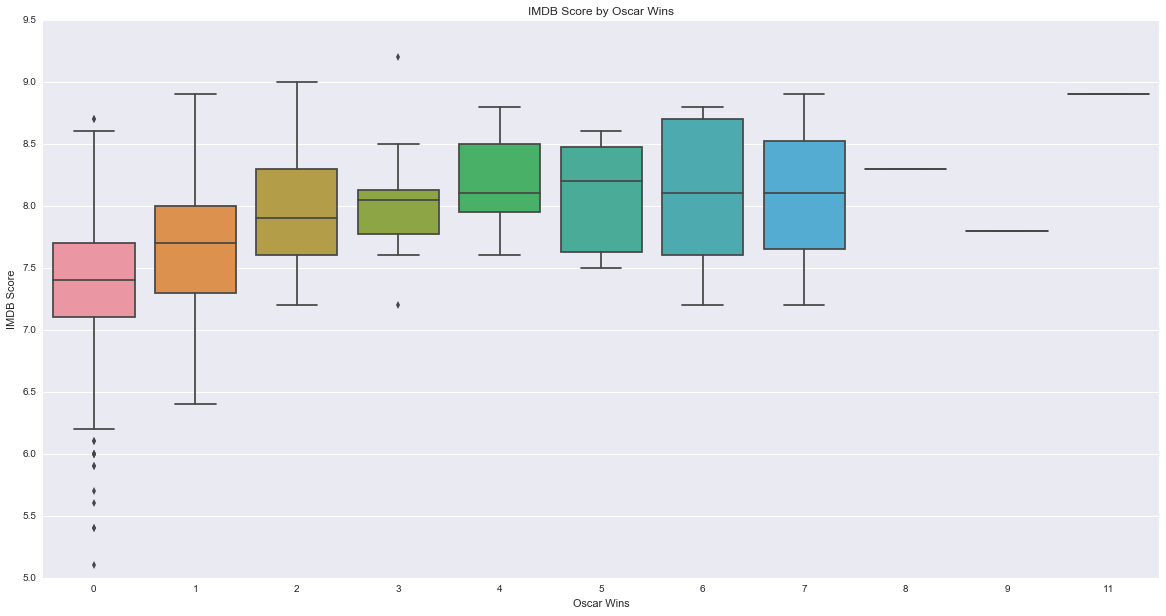

In [151]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('IMDB Score by Oscar Wins')

sns.boxplot(x=df['Oscar_Wins'], y=df['IMDB_Score'])
ax.set_xlabel('Oscar Wins')
ax.set_ylabel('IMDB Score');

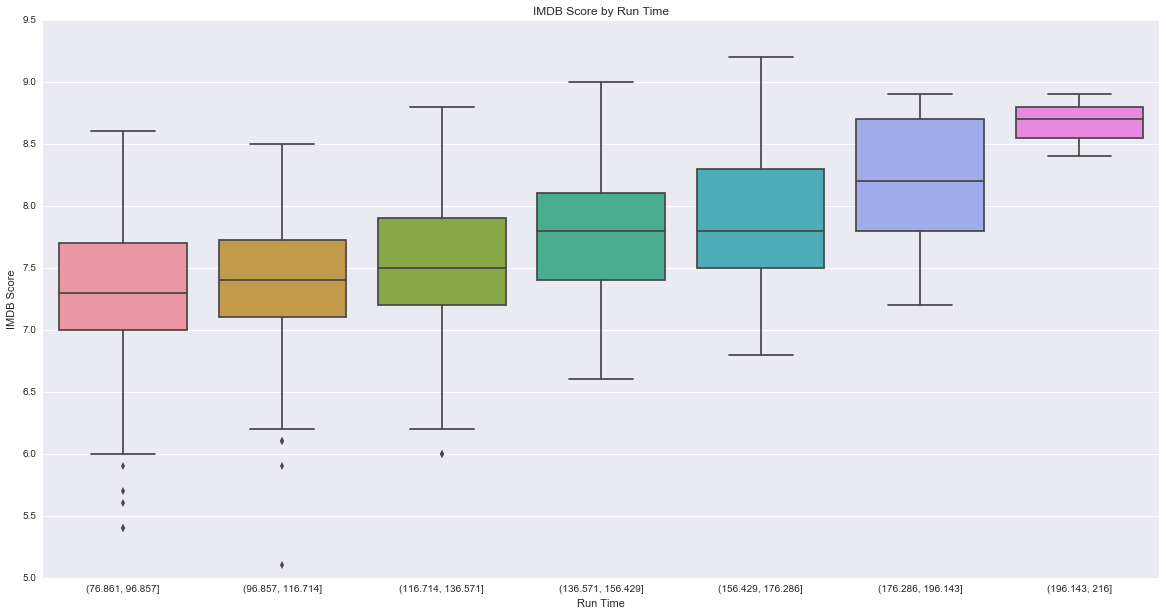

In [135]:
binned_x = pd.cut(df['Run_Time'], bins=7)

fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('IMDB Score by Run Time')

sns.boxplot(x=binned_x.sort_values(), y=df['IMDB_Score'])
ax.set_xlabel('Run Time')
ax.set_ylabel('IMDB Score');

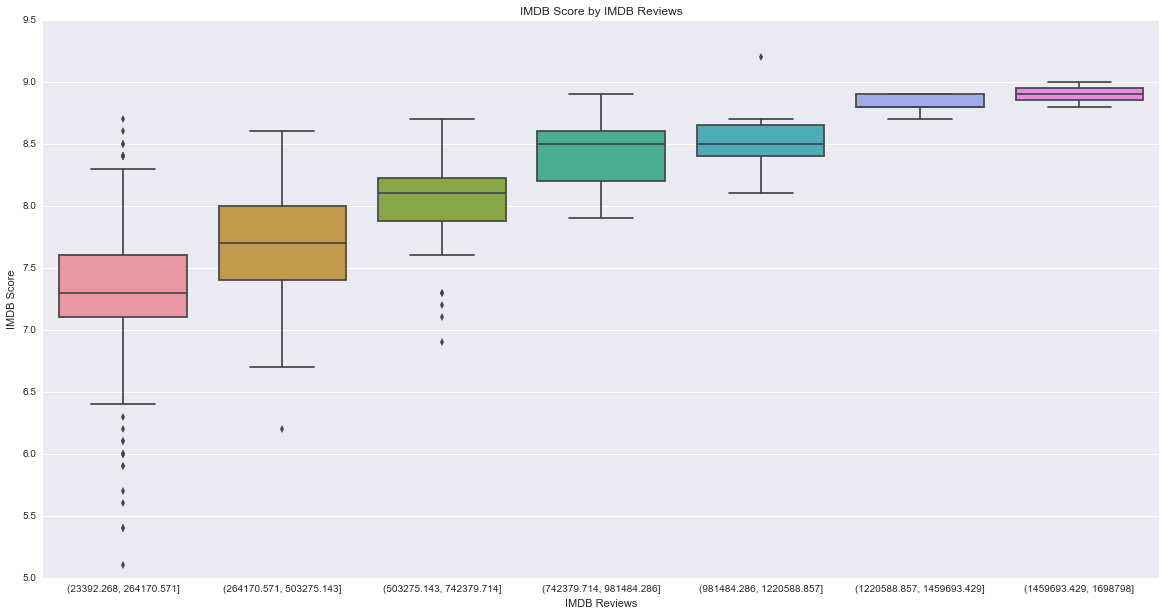

In [134]:
binned_x = pd.cut(df['IMDB_Reviews'], bins=7)

fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('IMDB Score by IMDB Reviews')

sns.boxplot(x=binned_x.sort_values(), y=df['IMDB_Score'])
ax.set_xlabel('IMDB Reviews')
ax.set_ylabel('IMDB Score');

In [248]:
df_dummies = pd.get_dummies(df['Genre1'], prefix = '1', drop_first=True)
df_dummies = pd.concat([df_dummies, pd.get_dummies(df['Genre2'], prefix = '2', drop_first=True)], axis=1)
df_dummies = pd.concat([df_dummies, pd.get_dummies(df['Year'], drop_first=True)], axis=1)  
df_dummies = pd.concat([df_dummies, pd.get_dummies(df['Rating'], drop_first=True)], axis=1)
df_dummies = pd.concat([df_dummies, pd.get_dummies(df['Month'], drop_first=True)], axis=1) 

relevant_dummies = ['1939', '1964', '1967', '1982', '2016', 
                    '1_Animation', '1_Biography', '1_Comedy', '1_Crime', 
                    '1_Drama', '2_Adventure', '2_Biography', '2_Comedy',
                     '2_Crime', '2_Drama', '2_Family', '2_Fantasy', '2_History',
                     '2_Horror', '2_Music', '2_Romance', '2_Sport', '2_Thriller', '2_Western',
                     'G', 'PASSED', 'PG', 'PG-13', 'R', 'UNRATED', 'August', 'December',
                      'February', 'July', 'October']
X_relevant_dummies = df_dummies[relevant_dummies]

In [250]:
df.columns

Index(['index', 'Budget', 'Genre1', 'Genre2', 'Gross_Revenue', 'IMDB_Reviews',
       'IMDB_Score', 'Metascore', 'Month', 'Opening_Week_Revenue',
       'Oscar_Wins', 'Rating', 'Run_Time', 'Title', 'Year', 'Month_int'],
      dtype='object')

In [255]:
y = df['IMDB_Score']
X = df[['Metascore', 'Run_Time', 'Oscar_Wins', 'Budget', 'IMDB_Reviews', 'Gross_Revenue', 'imdb_reviews_log', 'gross_rev_log']]

In [256]:
X = pd.concat([X, X_relevant_dummies], axis=1)

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [258]:
model4 = smf.OLS(y_train, X_train)
fit4 = model4.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDB_Score   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     5237.
Date:                Thu, 06 Oct 2016   Prob (F-statistic):               0.00
Time:                        09:23:19   Log-Likelihood:                -192.49
No. Observations:                 504   AIC:                             465.0
Df Residuals:                     464   BIC:                             633.9
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Metascore            0.0207      0.002      9.705      0.000         0.016     0.025
Run_Time             0.0079      0.001      7.556      0.000         0.006     0.010
Oscar_Wins          -0.0278      0.016     -1.691      0.092        -0.060     0.005
Budget           -1.888e-09   5.27e-10     -3.581      0.000     -2.92e-09 -8.52e-10
IMDB_Reviews      7.623e-09   1.18e-07      0.064      0.949     -2.25e-07   2.4e-07
Gross_Revenue    -1.829e-11   2.77e-10     -0.066      0.947     -5.63e-10  5.26e-10
imdb_reviews_log     0.4794      0.026     18.396      0.000         0.428     0.531
gross_rev_log       -0.0865      0.013     -6.419      0.000        -0.113    -0.060
1939                 0.4180      0.212      1.973      0.049         0.002     0.834
1964                 1.0706      0.410      2.608      0.009         0.264     1.877
1967             -1.322e-09   4.03e-10     -3.280      0.001     -2.11e-09  -5.3e-10
1982                 0.4255      0.279      1.527      0.127        -0.122     0.973
2016                 0.5117      0.133      3.853      0.000         0.251     0.773
1_Animation          0.3609      0.078      4.604      0.000         0.207     0.515
1_Biography          0.2107      0.068      3.117      0.002         0.078     0.344
1_Comedy             0.1771      0.067      2.628      0.009         0.045     0.310
1_Crime              0.2014      0.069      2.909      0.004         0.065     0.337
1_Drama              0.3862      0.093      4.174      0.000         0.204     0.568
2_Adventure          0.0507      0.077      0.656      0.512        -0.101     0.203
2_Biography          0.0905      0.137      0.663      0.508        -0.178     0.359
2_Comedy             0.0795      0.092      0.866      0.387        -0.101     0.260
2_Crime              0.0161      0.098      0.164      0.870        -0.177     0.209
2_Drama              0.0538      0.084      0.638      0.523        -0.112     0.219
2_Family            -0.0478      0.137     -0.350      0.727        -0.316     0.221
2_Fantasy           -0.4201      0.119     -3.525      0.000        -0.654    -0.186
2_History           -0.4063      0.178     -2.285      0.023        -0.756    -0.057
2_Horror            -0.1654      0.130     -1.269      0.205        -0.422     0.091
2_Music             -0.1401      0.159     -0.879      0.380        -0.453     0.173
2_Romance           -0.1184      0.140     -0.847      0.397        -0.393     0.156
2_Sport             -0.2748      0.233     -1.180      0.239        -0.733     0.183
2_Thriller          -0.0068      0.122     -0.056      0.956        -0.247     0.233
2_Western         1.973e-12   6.02e-13      3.279      0.001      7.91e-13  3.16e-12
G                    0.7299      0.185      3.935      0.000         0.365     1.094
PASSED               0.

In [259]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.59709742052680337

In [260]:
relevant_dummies2 = ['1939', '1964', '1967', '2016', 
                    '1_Animation', '1_Biography', '1_Crime', 
                    '1_Drama',
                     '2_Fantasy', '2_History',
                     'G', 'PASSED', 'PG', 'PG-13', 'R', 'UNRATED',
                      'February', 'July']
X_relevant_dummies2 = df_dummies[relevant_dummies2]

In [261]:
X = df[['Metascore', 'Run_Time', 'Oscar_Wins', 'Budget', 'IMDB_Reviews', 'Gross_Revenue', 'imdb_reviews_log', 'gross_rev_log']]

In [262]:
X = pd.concat([X, X_relevant_dummies2], axis=1)

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model5 = smf.OLS(y_train, X_train)
fit5 = model5.fit()
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDB_Score   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     5237.
Date:                Thu, 06 Oct 2016   Prob (F-statistic):               0.00
Time:                        09:23:26   Log-Likelihood:                -192.49
No. Observations:                 504   AIC:                             465.0
Df Residuals:                     464   BIC:                             633.9
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Metascore            0.0207      0.002      9.705      0.000         0.016     0.025
Run_Time             0.0079      0.001      7.556      0.000         0.006     0.010
Oscar_Wins          -0.0278      0.016     -1.691      0.092        -0.060     0.005
Budget           -1.888e-09   5.27e-10     -3.581      0.000     -2.92e-09 -8.52e-10
IMDB_Reviews      7.623e-09   1.18e-07      0.064      0.949     -2.25e-07   2.4e-07
Gross_Revenue    -1.829e-11   2.77e-10     -0.066      0.947     -5.63e-10  5.26e-10
imdb_reviews_log     0.4794      0.026     18.396      0.000         0.428     0.531
gross_rev_log       -0.0865      0.013     -6.419      0.000        -0.113    -0.060
1939                 0.4180      0.212      1.973      0.049         0.002     0.834
1964                 1.0706      0.410      2.608      0.009         0.264     1.877
1967             -1.322e-09   4.03e-10     -3.280      0.001     -2.11e-09  -5.3e-10
1982                 0.4255      0.279      1.527      0.127        -0.122     0.973
2016                 0.5117      0.133      3.853      0.000         0.251     0.773
1_Animation          0.3609      0.078      4.604      0.000         0.207     0.515
1_Biography          0.2107      0.068      3.117      0.002         0.078     0.344
1_Comedy             0.1771      0.067      2.628      0.009         0.045     0.310
1_Crime              0.2014      0.069      2.909      0.004         0.065     0.337
1_Drama              0.3862      0.093      4.174      0.000         0.204     0.568
2_Adventure          0.0507      0.077      0.656      0.512        -0.101     0.203
2_Biography          0.0905      0.137      0.663      0.508        -0.178     0.359
2_Comedy             0.0795      0.092      0.866      0.387        -0.101     0.260
2_Crime              0.0161      0.098      0.164      0.870        -0.177     0.209
2_Drama              0.0538      0.084      0.638      0.523        -0.112     0.219
2_Family            -0.0478      0.137     -0.350      0.727        -0.316     0.221
2_Fantasy           -0.4201      0.119     -3.525      0.000        -0.654    -0.186
2_History           -0.4063      0.178     -2.285      0.023        -0.756    -0.057
2_Horror            -0.1654      0.130     -1.269      0.205        -0.422     0.091
2_Music             -0.1401      0.159     -0.879      0.380        -0.453     0.173
2_Romance           -0.1184      0.140     -0.847      0.397        -0.393     0.156
2_Sport             -0.2748      0.233     -1.180      0.239        -0.733     0.183
2_Thriller          -0.0068      0.122     -0.056      0.956        -0.247     0.233
2_Western         1.973e-12   6.02e-13      3.279      0.001      7.91e-13  3.16e-12
G                    0.7299      0.185      3.935      0.000         0.365     1.094
PASSED               0.

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.63038069789776874

In [311]:
relevant_dummies3 = ['1964', '1967', '2016', 
                    '1_Animation', '1_Biography', '1_Crime', 
                    '1_Drama',
                     '2_Fantasy', '2_History',
                     'G', 'PG', 'PG-13', 'R', 'UNRATED',
                      'February']
X_relevant_dummies3 = df_dummies[relevant_dummies3]

In [312]:
X = df[['Metascore', 'Run_Time', 'Oscar_Wins', 'Budget', 'IMDB_Reviews', 'Gross_Revenue', 'imdb_reviews_log', 'gross_rev_log']]
X = pd.concat([X, X_relevant_dummies3], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [313]:
model6 = smf.OLS(y_train, X_train)
fit6 = model6.fit()
fit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDB_Score   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     9743.
Date:                Thu, 06 Oct 2016   Prob (F-statistic):               0.00
Time:                        12:59:08   Log-Likelihood:                -204.86
No. Observations:                 504   AIC:                             451.7
Df Residuals:                     483   BIC:                             540.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Metascore            0.0212      0.002      9.977      0.000         0.017     0.025
Run_Time             0.0076      0.001      7.916      0.000         0.006     0.009
Oscar_Wins          -0.0397      0.016     -2.494      0.013        -0.071    -0.008
Budget            -2.82e-09   5.37e-10     -5.249      0.000     -3.88e-09 -1.76e-09
IMDB_Reviews     -2.147e-07   1.22e-07     -1.757      0.080     -4.55e-07  2.54e-08
Gross_Revenue       6.1e-11   2.96e-10      0.206      0.837     -5.21e-10  6.43e-10
imdb_reviews_log     0.5042      0.026     19.044      0.000         0.452     0.556
gross_rev_log       -0.0791      0.014     -5.670      0.000        -0.107    -0.052
1964             -7.414e-17   1.09e-16     -0.678      0.498     -2.89e-16  1.41e-16
1967             -3.028e-16   1.26e-16     -2.411      0.016     -5.49e-16 -5.61e-17
2016                 0.5209      0.115      4.534      0.000         0.295     0.747
1_Animation          0.4044      0.073      5.569      0.000         0.262     0.547
1_Biography          0.1629      0.053      3.074      0.002         0.059     0.267
1_Crime              0.1538      0.052      2.952      0.003         0.051     0.256
1_Drama              0.2700      0.065      4.155      0.000         0.142     0.398
2_Fantasy           -0.4146      0.109     -3.803      0.000        -0.629    -0.200
2_History           -0.2987      0.194     -1.542      0.124        -0.679     0.082
G                    0.3630      0.172      2.114      0.035         0.026     0.700
PG                   0.4089      0.143      2.864      0.004         0.128     0.689
PG-13                0.4934      0.134      3.695      0.000         0.231     0.756
R                    0.4181      0.128      3.258      0.001         0.166     0.670
UNRATED              0.3709      0.223      1.664      0.097        -0.067     0.809
February             0.2028      0.071      2.872      0.004         0.064     0.342
==============================================================================
Omnibus:                        7.719   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                9.700
Skew:                          -0.159   Prob(JB):                      0.00783
Kurtosis:                       3.601   Cond. No.                     1.07e+26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.96e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [369]:
relevant_dummies4 = ['1964','1967', '2016', 
                    '1_Animation', '1_Biography', '1_Crime', 
                    '1_Drama',
                     '2_Fantasy',
                     'G', 'PG', 'PG-13', 'R', 'UNRATED',
                      'February']
X_relevant_dummies4 = df_dummies[relevant_dummies4]
X = df[['Metascore', 'Run_Time', 'Oscar_Wins', 'Budget', 'IMDB_Reviews', 'Gross_Revenue', 'imdb_reviews_log', 'gross_rev_log']]
X = pd.concat([X, X_relevant_dummies4], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [357]:
model7 = smf.OLS(y_train, X_train)
fit7 = model7.fit()
fit7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDB_Score   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     8739.
Date:                Thu, 06 Oct 2016   Prob (F-statistic):               0.00
Time:                        14:12:48   Log-Likelihood:                -223.11
No. Observations:                 504   AIC:                             490.2
Df Residuals:                     482   BIC:                             583.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Metascore            0.0232      0.002     10.716      0.000         0.019     0.027
Run_Time             0.0071      0.001      7.181      0.000         0.005     0.009
Oscar_Wins          -0.0270      0.016     -1.721      0.086        -0.058     0.004
Budget           -2.797e-09   5.37e-10     -5.212      0.000     -3.85e-09 -1.74e-09
IMDB_Reviews     -3.093e-08   1.25e-07     -0.248      0.804     -2.76e-07  2.14e-07
Gross_Revenue    -6.015e-12   2.96e-10     -0.020      0.984     -5.88e-10  5.76e-10
imdb_reviews_log     0.4970      0.028     17.486      0.000         0.441     0.553
gross_rev_log       -0.0882      0.015     -5.792      0.000        -0.118    -0.058
1964                 0.8636      0.411      2.099      0.036         0.055     1.672
1967                 1.0336      0.416      2.488      0.013         0.217     1.850
2016                 0.6728      0.132      5.113      0.000         0.414     0.931
1_Animation          0.3392      0.075      4.536      0.000         0.192     0.486
1_Biography          0.1749      0.055      3.204      0.001         0.068     0.282
1_Crime              0.1553      0.057      2.732      0.007         0.044     0.267
1_Drama              0.2242      0.066      3.421      0.001         0.095     0.353
2_Fantasy           -0.3911      0.114     -3.425      0.001        -0.615    -0.167
G                    0.5555      0.180      3.078      0.002         0.201     0.910
PG                   0.6021      0.157      3.838      0.000         0.294     0.910
PG-13                0.6329      0.148      4.276      0.000         0.342     0.924
R                    0.5202      0.144      3.603      0.000         0.237     0.804
UNRATED              0.5944      0.200      2.976      0.003         0.202     0.987
February             0.2300      0.077      2.969      0.003         0.078     0.382
==============================================================================
Omnibus:                       18.003   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.103
Skew:                          -0.380   Prob(JB):                     2.62e-05
Kurtosis:                       3.653   Cond. No.                     4.38e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [358]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.63236785803735984

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [532]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import Lasso, ElasticNet, Ridge

lasso = Lasso()
en = ElasticNet()
ridge = Ridge()

param_grid = [{"alpha":[0.0001, 0.001, 0.01, 0.1, 0.5, 1]}]
grid = GridSearchCV(lasso, param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_params_)

grid2 = GridSearchCV(en, param_grid, cv=5)
grid2.fit(X_train, y_train)
print(grid2.best_score_, grid2.best_params_)

grid3 = GridSearchCV(ridge, param_grid, cv=5)
grid3.fit(X_train, y_train)
print(grid3.best_score_, grid3.best_params_)

scores = cross_val_score(lr, X, y, cv=5)
print(scores.mean())

0.578386317789699 {'alpha': 0.0001}
0.5786687001673686 {'alpha': 0.0001}
0.5811538588703447 {'alpha': 1}
0.48866649863


In [408]:
model_lasso = Lasso(alpha = 0.0001)
fit_lasso = model_lasso.fit(X_train, y_train)
print(fit_lasso.score(X_test, y_test))

model_en = ElasticNet(alpha = 0.0001)
fit_en = model_en.fit(X_train, y_train)
print(fit_en.score(X_test, y_test))

model_ridge = Ridge(alpha = 1)
fit_ridge = model_ridge.fit(X_train, y_train)
print(fit_ridge.score(X_test, y_test))

0.680247061245
0.679685075785
0.687851593371


In [416]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#Gradient Boosting
gbmod = GradientBoostingRegressor(n_estimators = 1000, learning_rate = .1)
gbmod.fit(X_train, y_train)
prval = gbmod.predict(X_test)
gbmod.score(X_test, y_test)

0.55604797125559757

In [435]:
#Random Forest
rf = RandomForestRegressor(n_estimators = 1000)
rf.fit(X_train, y_train)
print(rf.score(X_test,y_test))

0.551737294506


In [417]:
#Ridge wins!
pred_y = fit_ridge.predict(X)
residuals = y - pred_y

/Users/travisjames/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


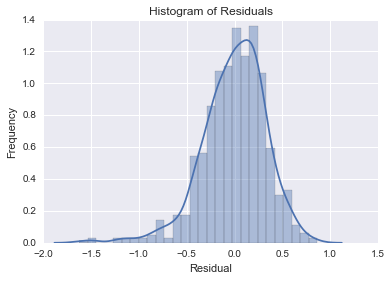

In [462]:
ax = sns.distplot(residuals, axlabel = "Residual")
ax.set_title('Histogram of Residuals')
ax.set_ylabel('Frequency');

In [464]:
X.columns

Index(['Metascore', 'Run_Time', 'Oscar_Wins', 'Budget', 'IMDB_Reviews',
       'Gross_Revenue', 'imdb_reviews_log', 'gross_rev_log', '1964', '1967',
       '2016', '1_Animation', '1_Biography', '1_Crime', '1_Drama', '2_Fantasy',
       'G', 'PG', 'PG-13', 'R', 'UNRATED', 'February'],
      dtype='object')

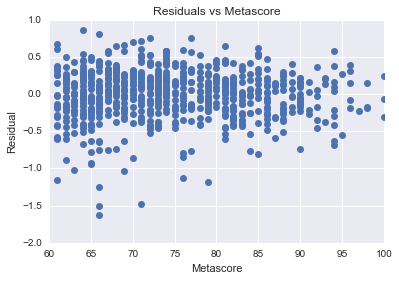

In [463]:
plt.plot(X['Metascore'], residuals, 'o')
plt.xlabel('Metascore')
plt.ylabel('Residual')
plt.title('Residuals vs Metascore');

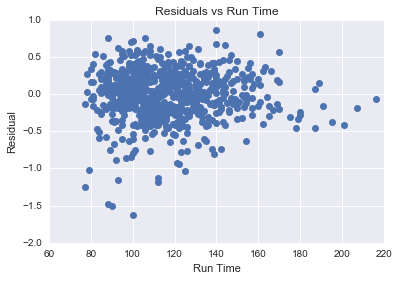

In [465]:
plt.plot(X['Run_Time'], residuals, 'o')
plt.xlabel('Run Time')
plt.ylabel('Residual')
plt.title('Residuals vs Run Time');

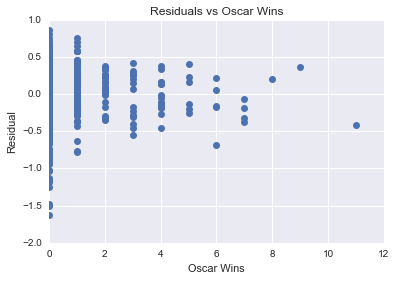

In [466]:
plt.plot(X['Oscar_Wins'], residuals, 'o')
plt.xlabel('Oscar Wins')
plt.ylabel('Residual')
plt.title('Residuals vs Oscar Wins');

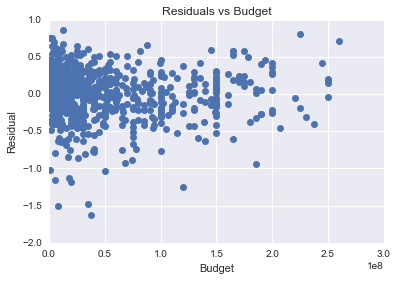

In [467]:
plt.plot(X['Budget'], residuals, 'o')
plt.xlabel('Budget')
plt.ylabel('Residual')
plt.title('Residuals vs Budget');

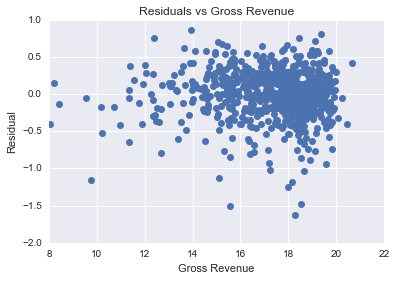

In [470]:
plt.plot(X['gross_rev_log'], residuals, 'o')
plt.xlabel('Log Gross Revenue')
plt.ylabel('Residual')
plt.title('Residuals vs Gross Revenue');

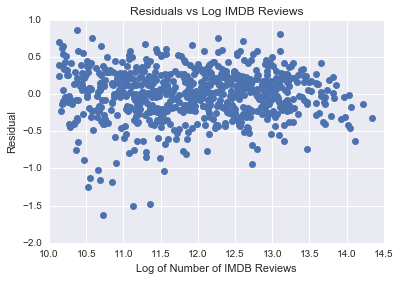

In [472]:
plt.plot(X['imdb_reviews_log'], residuals, 'o')
plt.xlabel('Log of Number of IMDB Reviews')
plt.ylabel('Residual')
plt.title('Residuals vs Log IMDB Reviews');

In [473]:
X['IMDB_Reviews'].min()

25066

In [474]:
X['IMDB_Reviews'].max()

1698798

In [475]:
X.columns

Index(['Metascore', 'Run_Time', 'Oscar_Wins', 'Budget', 'IMDB_Reviews',
       'Gross_Revenue', 'imdb_reviews_log', 'gross_rev_log', '1964', '1967',
       '2016', '1_Animation', '1_Biography', '1_Crime', '1_Drama', '2_Fantasy',
       'G', 'PG', 'PG-13', 'R', 'UNRATED', 'February'],
      dtype='object')

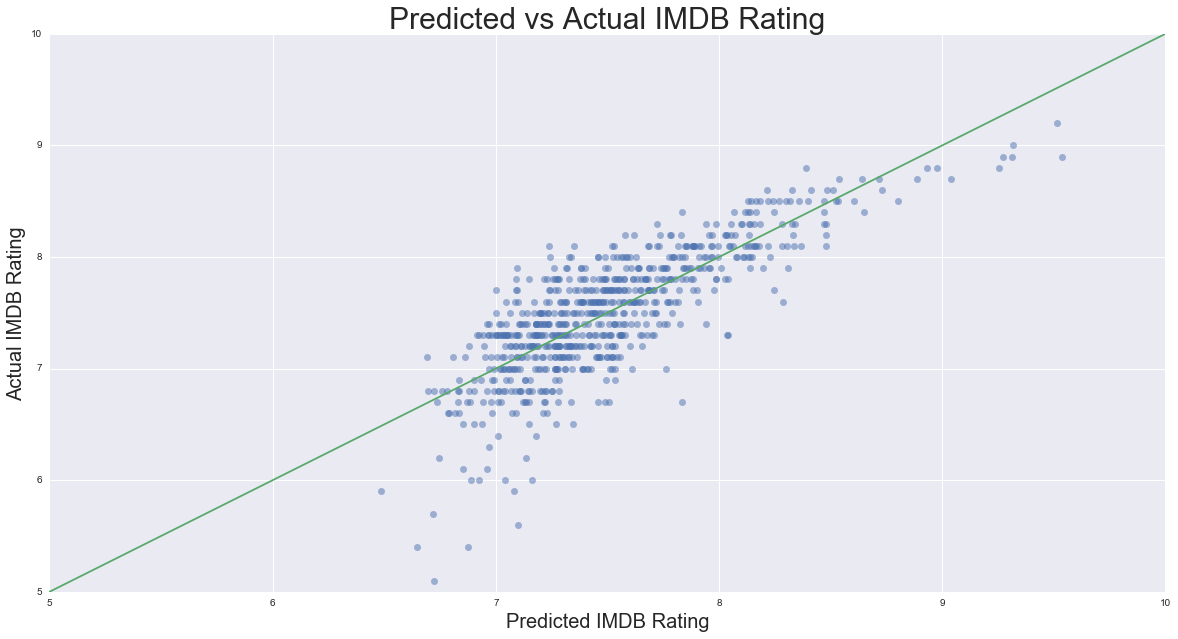

In [535]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
plt.plot(pred_y, y, 'o', alpha=0.5)
plt.xlabel('Predicted IMDB Rating', fontsize=20)
plt.ylabel('Actual IMDB Rating', fontsize=20)
plt.xlim([5,10])
plt.ylim([5,10])
line = np.linspace(5,10)
plt.plot(line,line)
plt.title('Predicted vs Actual IMDB Rating', fontsize=30);

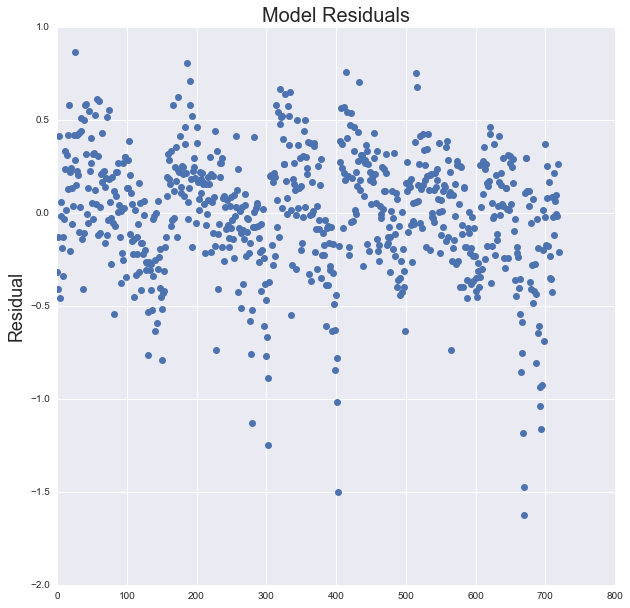

In [425]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
plt.plot(residuals, 'o')
plt.ylabel('Residual', fontsize=18)
plt.title('Model Residuals', fontsize=20);

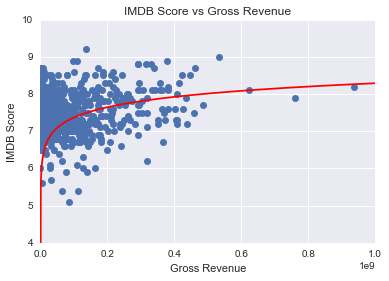

In [530]:
plt.plot(X['Gross_Revenue'], y, 'o')
x = np.linspace(2.0, 1e9, 1000)
y2 = np.log(x)*(1/2.5)
plt.plot(x, y2, 'r')
plt.ylim(4, 10)
plt.title('IMDB Score vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('IMDB Score');

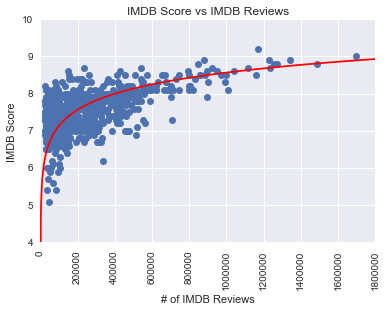

In [531]:
plt.plot(X['IMDB_Reviews'], y, 'o')
plt.xticks(rotation='vertical')
x = np.linspace(2.0, 1800000, 1000)
y2 = np.log(x)*(0.62)
plt.plot(x, y2, 'r')
plt.ylim(4, 10)
plt.title('IMDB Score vs IMDB Reviews')
plt.xlabel('# of IMDB Reviews')
plt.ylabel('IMDB Score');

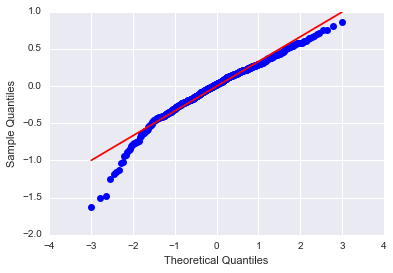

In [551]:
import statsmodels.api as sm

plot = sm.qqplot(residuals, line='s')
#plot.set_title('Q-Q Plot of Residuals')
plt.show(plot)

In [555]:
coefficients = dict(zip(X.columns,fit_ridge.coef_))

In [556]:
print(coefficients)

{'Gross_Revenue': 2.3663249146214442e-10, 'R': 0.18496898357121483, '1_Crime': 0.06127587728682183, 'gross_rev_log': -0.080550996145572706, 'imdb_reviews_log': 0.1451448671809622, '1964': 0.14261565912439142, 'Run_Time': 0.0052318925378091732, '1967': 0.0, '1_Biography': 0.063598446464968664, 'UNRATED': 0.25173777438401534, 'Metascore': 0.017339070195622957, 'PG-13': 0.23050358865041623, 'IMDB_Reviews': 1.1051740196605641e-06, '2016': 0.56541970823953491, 'PG': 0.16631970151289491, 'Oscar_Wins': -0.0099881893801317505, 'G': 0.16928180907619228, '2_Fantasy': -0.40017668166612563, 'Budget': -2.1295752783080555e-09, '1_Animation': 0.24066162472779859, '1_Drama': 0.17595663182142954, 'February': 0.1945636812466931}
